In [553]:
import numpy as np
import matplotlib.pyplot as plt
import traceback

In [554]:
def get_theta_weighted(theta_tprev, P_tprev, phi, y, alpha, debug=False):
    theta_t = theta_tprev + (P_tprev @ phi) / (alpha + np.transpose(phi) @ P_tprev @ phi) * (y - np.transpose(phi) @ theta_tprev)
    if debug:
        print(theta_tprev)
        print(P_tprev)
        print(phi)
        print(theta_tprev + (P_tprev @ phi))
        print('---------')
    return theta_t

def get_P_weighted(P_tprev, phi, alpha):
    P_t = (1/alpha)*(P_tprev - (P_tprev @ phi @ np.transpose(phi) @ P_tprev) / (alpha + np.transpose(phi) @ P_tprev @ phi))
    return P_t

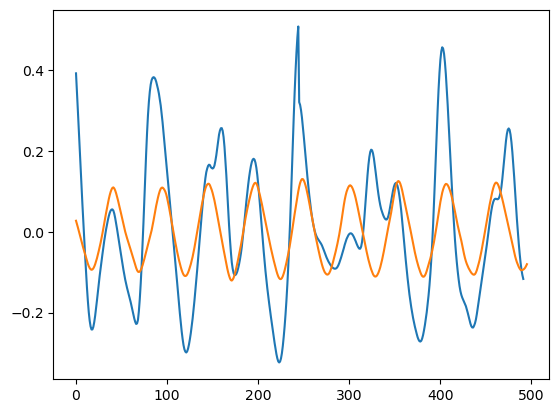

In [555]:
y = np.loadtxt("associated_files/data_set_1/CorruptedPPG1.txt")
a = np.loadtxt("associated_files/data_set_1/noise_reference.txt")
x = np.loadtxt("associated_files/GoodPPG.txt")

plt.plot(y)
plt.plot(a)

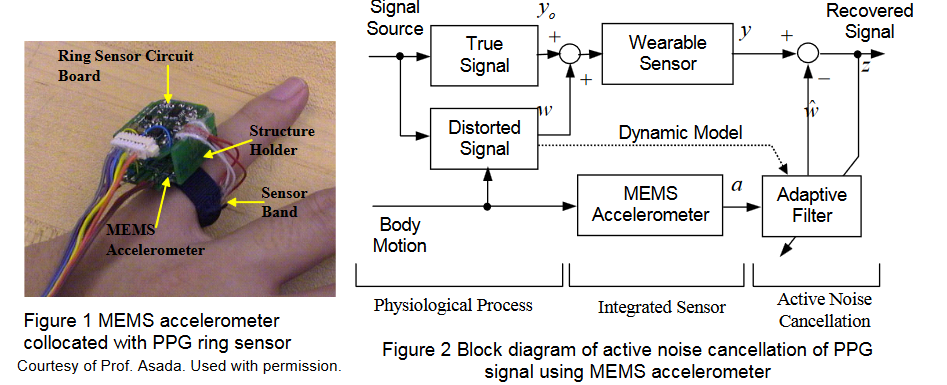

We want the filter to discover the distorted signal w, so that we can remove the effect of body motion from the main sensor measurements. so we want to find the set of parameters $\Theta$ to minimize the difference between our distorted signal estimate $\hat{w}$ and the actual distorted signal $w$:

$$ \hat{\theta} = \operatorname{arg\,min}_{\hat{\theta}} E[(\hat{w}(t)-w(t))^2] $$ 
$$  = \operatorname{arg\,min}_{\hat{\theta}} E[(w(t)-\phi(t)^T\theta)^2] $$

However, we cant measure $w(t)$ directly. Instead, we can look at the recovered signal $z(t)$:
$$ z(t) = y(t) - \hat{w}(t) = y(t) - \phi(t)^T\theta $$
Instead of minimizing the distorted signal discrepency, we can minimize the recovered signal:
$$  = \operatorname{arg\,min}_{\hat{\theta}} E[{z^2(t|\theta)}]

In [556]:
m = 5
y = np.pad(y, (m, 0), 'constant', constant_values=(0))
theta0 = np.zeros(m).reshape(m, 1)
P0 = 1*np.eye(m)
thetas = []
alpha = 1
P = P0
theta = theta0
thetas.append(theta)
z = []

for t in range(m, len(y)):
    P_prev = P
    theta_prev = theta
    phi = a[t-m:t].reshape(m, 1)
    theta = get_theta_weighted(theta_prev, P_prev, phi, y[t], alpha)
    P = get_P_weighted(P_prev, phi, alpha)
    thetas.append(theta)
    
    reconstruction = y[t]-np.transpose(phi)@theta
    z.append(reconstruction[0,0])

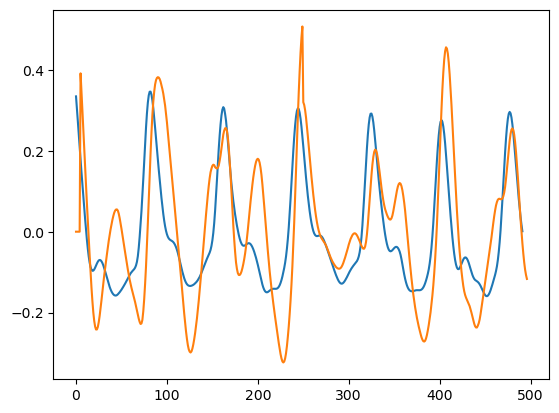

In [557]:
plt.plot(x)
plt.plot(y)

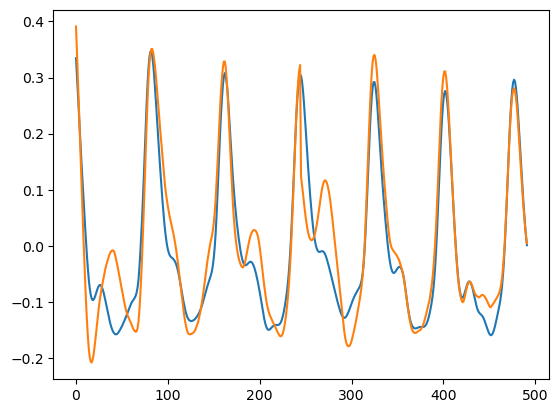

In [558]:

plt.plot(x)
plt.plot(z)

In [559]:
y = np.loadtxt("associated_files/data_set_1/CorruptedPPG1.txt")
a = np.loadtxt("associated_files/data_set_1/noise_reference.txt")
x = np.loadtxt("associated_files/GoodPPG.txt")
z = np.asarray(z)


e1 = np.transpose(x-z)@(x-z)
e2 = np.transpose(x-y)@(x-y)

print(e1)
print(e2)

1.5085088230689538
6.401166728398094


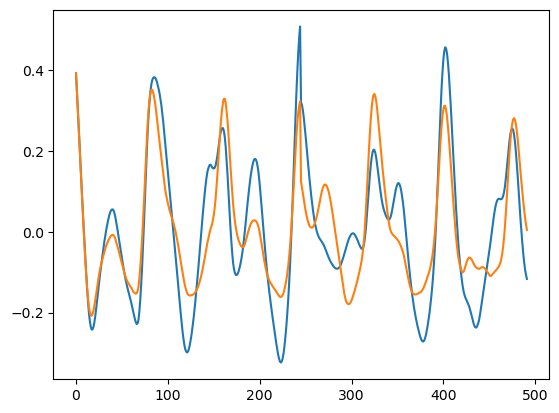

In [560]:
plt.plot(y)
plt.plot(z)